In [13]:
# Import library yang kalian butuhkan
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import math
import pandas as pd
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

Kode tersebut mengimpor berbagai pustaka yang diperlukan untuk analisis data, pemrosesan citra, pembelajaran mesin, dan visualisasi. Pertama, `matplotlib.pyplot` diimpor sebagai `plt` untuk membuat visualisasi data seperti grafik dan plot. `numpy` diimpor sebagai `np` untuk komputasi numerik dengan dukungan untuk array dan matriks multidimensi. OpenCV diimpor sebagai `cv` untuk pemrosesan citra dan video. Pustaka standar `os` digunakan untuk berinteraksi dengan sistem operasi, sementara `math` menyediakan fungsi matematika dasar. `pandas` diimpor sebagai `pd` untuk manipulasi dan analisis data dalam bentuk tabel data. Pustaka `random` digunakan untuk menghasilkan angka acak, dan `tqdm` digunakan untuk menampilkan progress bar saat menjalankan loop. Dari scikit-learn, `train_test_split` digunakan untuk membagi dataset menjadi set pelatihan dan pengujian, `RandomForestClassifier` untuk tugas klasifikasi, serta berbagai metrik evaluasi seperti `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score`, dan `f1_score` untuk mengukur kinerja model pembelajaran mesin. `UndefinedMetricWarning` diimpor untuk menangani peringatan terkait metrik yang tidak terdefinisi, dan pustaka `warnings` digunakan untuk mengontrol peringatan yang muncul selama eksekusi kode. Kode ini mencakup berbagai aspek yang diperlukan dalam proyek pembelajaran mesin, memastikan proses manipulasi data, pemrosesan citra, evaluasi model, dan penanganan peringatan dapat dilakukan dengan baik.

## Data Loading

In [14]:

def insertPic(folder, image_size=(150, 150), batch_size=100):
    all_images = []
    all_filenames = []
    all_labels = []

    label_dirs = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]

    for label in label_dirs:
        label_path = os.path.join(folder, label)
        filenames = os.listdir(label_path)
        
        for i in range(0, len(filenames), batch_size):
            batch_filenames = filenames[i:i + batch_size]
            images = []
            labels = []
            for filename in batch_filenames:
                img_path = os.path.join(label_path, filename)
                img = cv.imread(img_path, cv.IMREAD_COLOR)
                
                if img is not None:
                    resized = cv.resize(img, image_size, interpolation=cv.INTER_AREA) 
                    images.append(resized)
                    labels.append(label)

            all_images.extend(images)
            all_filenames.extend(batch_filenames)
            all_labels.extend(labels)

    return all_images, all_filenames, all_labels

Kode tersebut mendefinisikan sebuah fungsi bernama `insertPic` yang bertujuan untuk memuat, mengubah ukuran, dan mengelompokkan gambar dari suatu folder, serta mengembalikan daftar gambar, nama file, dan label. Fungsi ini menerima tiga parameter: `folder` yang menunjukkan direktori utama tempat gambar berada, `image_size` yang merupakan tuple untuk menentukan ukuran gambar setelah diubah ukurannya (default 150x150 piksel), dan `batch_size` yang menentukan jumlah gambar yang diproses dalam setiap batch (default 100).

Pada awalnya, fungsi ini membuat tiga daftar kosong: `all_images` untuk menyimpan semua gambar, `all_filenames` untuk menyimpan semua nama file, dan `all_labels` untuk menyimpan semua label. Kemudian, fungsi ini mencari semua subdirektori dalam folder utama yang dianggap sebagai label. Setiap subdirektori diasumsikan mewakili kelas atau label yang berbeda.

Untuk setiap label, fungsi ini masuk ke subdirektori yang sesuai, memuat daftar nama file gambar, dan memprosesnya dalam batch sesuai dengan `batch_size`. Di dalam setiap batch, gambar diimpor menggunakan OpenCV (`cv.imread`), diubah ukurannya menjadi `image_size` menggunakan interpolasi area, dan kemudian ditambahkan ke daftar `images` dan `labels`. Setelah setiap batch diproses, daftar `images`, `batch_filenames`, dan `labels` yang baru diproses ditambahkan ke daftar utama `all_images`, `all_filenames`, dan `all_labels`.

Pada akhirnya, fungsi ini mengembalikan tiga daftar yang berisi semua gambar yang diubah ukurannya, nama file asli dari gambar-gambar tersebut, dan label yang sesuai. Ini memungkinkan pengguna untuk dengan mudah mengelola dan memproses gambar dalam jumlah besar secara efisien dalam batch yang lebih kecil.

Jumlah total gambar: 2100
Distribusi data per label:
finger_1: 422
finger_2: 419
finger_3: 420
finger_4: 420
finger_5: 419


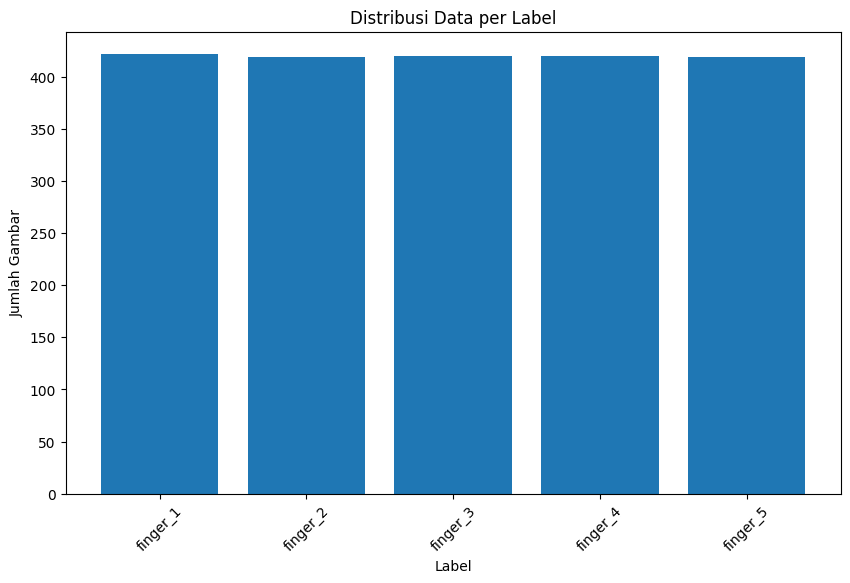

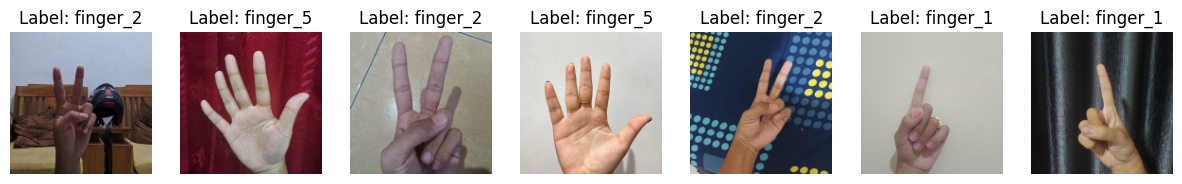

In [15]:
def eksploration(images, labels):
    print(f"Jumlah total gambar: {len(images)}")
    
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    print("Distribusi data per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Data per Label')
    plt.xticks(rotation=45)
    plt.show()
    
    num_samples = 7
    sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv.cvtColor(images[idx], cv.COLOR_BGR2RGB))
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()
    
images, filenames, labels = insertPic('Finger Simulation Dataset 2024', image_size=(150, 150))
eksploration(images,labels)

Kode tersebut mendefinisikan fungsi `eksploration` yang bertujuan untuk mengeksplorasi dataset gambar dan label yang diberikan dengan memberikan informasi statistik serta visualisasi data. Fungsi ini menerima dua parameter: `images` yang merupakan daftar gambar, dan `labels` yang merupakan daftar label yang sesuai dengan gambar-gambar tersebut.

Pertama, fungsi ini mencetak jumlah total gambar yang ada dalam dataset dengan menggunakan `len(images)`. Selanjutnya, fungsi ini menghitung distribusi label dalam dataset dengan menggunakan sebuah kamus (`label_counts`). Untuk setiap label dalam daftar `labels`, fungsi ini memperbarui jumlah kemunculan label tersebut dalam kamus. Setelah itu, distribusi data per label dicetak ke layar.

Fungsi ini kemudian membuat sebuah grafik batang (bar plot) untuk memvisualisasikan distribusi data per label. Grafik ini menunjukkan jumlah gambar untuk setiap label, dengan sumbu-x berisi label dan sumbu-y berisi jumlah gambar. Grafik diberi judul "Distribusi Data per Label" dan label pada sumbu-x dirotasi sebesar 45 derajat untuk keterbacaan yang lebih baik.

Selanjutnya, fungsi ini menampilkan beberapa contoh gambar dari dataset secara acak. Sebanyak 7 gambar dipilih secara acak dari daftar `images` menggunakan `np.random.choice`, kemudian setiap gambar ditampilkan dalam subplot yang bersebelahan. Gambar-gambar ini ditampilkan dengan menggunakan `plt.imshow`, setelah dikonversi dari format BGR (Blue-Green-Red) ke RGB (Red-Green-Blue) menggunakan `cv.cvtColor` dari OpenCV. Setiap subplot juga menampilkan label yang sesuai dengan gambar tersebut sebagai judul, dan sumbu-sumbu pada subplot dimatikan untuk tampilan yang lebih bersih.

Terakhir, kode ini memanggil fungsi `insertPic` untuk memuat gambar dan label dari direktori "Finger Simulation Dataset 2024" dengan ukuran gambar 150x150 piksel, dan kemudian memanggil fungsi `eksploration` dengan gambar dan label yang telah dimuat untuk melakukan eksplorasi dataset.

Secara keseluruhan, fungsi `eksploration` membantu dalam memahami distribusi label dalam dataset serta memberikan visualisasi contoh-contoh gambar, yang sangat berguna dalam tahap eksplorasi data pada proyek pembelajaran mesin.

## Data Preparation

### Data Augmentation

In [16]:
def rotation (image, derajat):
        rotated = image.copy()
        sudut= np.deg2rad(derajat)
        heighttengah = int((image.shape[1]-1)/2)
        widthtengah = int((image.shape[0]-1)/2)
        for i in range (rotated.shape[0]):
            for j in range (rotated.shape[1]):
                x=(i-heighttengah)*np.cos(sudut)+(j-widthtengah)*np.sin(sudut)
                y=-(i-heighttengah)*np.sin(sudut)+(j-widthtengah)*np.cos(sudut)
                x = int(x + heighttengah)
                y = int(y + widthtengah)
                if x>=0 and y>=0 and x<rotated.shape[0] and y<rotated.shape[1] :
                    rotated[i][j]= image[x][y]
        return rotated

Kode tersebut mendefinisikan fungsi `rotation` yang bertujuan untuk memutar sebuah gambar dengan sudut tertentu yang diberikan dalam derajat. Fungsi ini menerima dua parameter: `image` yang merupakan gambar yang akan diputar, dan `derajat` yang merupakan besar sudut rotasi dalam derajat.

Pertama, fungsi ini membuat salinan dari gambar asli yang akan digunakan sebagai gambar yang sudah diputar (`rotated`). Kemudian, sudut rotasi dalam derajat dikonversi menjadi radian menggunakan `np.deg2rad(derajat)`. Fungsi ini juga menghitung posisi tengah gambar dalam hal tinggi (`heighttengah`) dan lebar (`widthtengah`), yang digunakan sebagai titik acuan untuk rotasi.

Selanjutnya, fungsi ini menggunakan dua loop bersarang untuk iterasi melalui setiap piksel dalam gambar yang sudah diputar. Untuk setiap piksel `(i, j)`, fungsi ini menghitung koordinat baru `(x, y)` dari piksel yang sesuai pada gambar asli berdasarkan transformasi rotasi. Transformasi rotasi ini dilakukan dengan menggunakan matriks rotasi yang melibatkan fungsi trigonometri `cos` dan `sin`. Setelah koordinat baru `(x, y)` dihitung, nilai piksel pada posisi baru ini dipindahkan ke posisi asli pada gambar yang sudah diputar (`rotated`).

Koordinat baru `(x, y)` kemudian dikonversi kembali menjadi bilangan bulat dan disesuaikan dengan posisi tengah gambar. Jika koordinat baru berada dalam batas valid dari gambar (`x` dan `y` tidak negatif dan tidak melebihi batas ukuran gambar), nilai piksel pada posisi `(x, y)` dari gambar asli dipindahkan ke posisi `(i, j)` pada gambar yang sudah diputar. 

Terakhir, fungsi ini mengembalikan gambar yang sudah diputar (`rotated`). Fungsi ini pada dasarnya memutar gambar dengan sudut yang diberikan menggunakan transformasi rotasi manual, tanpa menggunakan fungsi rotasi built-in dari pustaka gambar seperti OpenCV.

In [17]:
def mirroring(image, axis):
        mirrored = image.copy()
        if axis == 0:
            for i in range (mirrored.shape[0]):
                for j in range (mirrored.shape[1]):
                    mirrored[i][j] = image[mirrored.shape[0]-1-i][j]
        elif axis == 1:
            for i in range (mirrored.shape[0]):
                for j in range (mirrored.shape[1]):
                    mirrored[i][j] = image[i][mirrored.shape[1]-1-j]
        return mirrored

Kode tersebut mendefinisikan fungsi `mirroring` yang bertujuan untuk mencerminkan sebuah gambar berdasarkan sumbu tertentu. Fungsi ini menerima dua parameter: `image` yang merupakan gambar yang akan dicerminkan, dan `axis` yang menentukan sumbu cerminan (0 untuk sumbu horizontal dan 1 untuk sumbu vertikal).

Pertama, fungsi ini membuat salinan dari gambar asli yang akan digunakan sebagai gambar hasil cerminan (`mirrored`). Kemudian, fungsi ini memeriksa nilai parameter `axis` untuk menentukan jenis cerminan yang akan dilakukan.

Jika `axis` bernilai 0, fungsi ini akan mencerminkan gambar secara horizontal. Dua loop bersarang digunakan untuk iterasi melalui setiap piksel dalam gambar yang dicerminkan. Untuk setiap piksel pada posisi `(i, j)`, fungsi ini menempatkan nilai piksel dari posisi yang sesuai pada gambar asli `(mirrored.shape[0]-1-i, j)` ke posisi `(i, j)` pada gambar hasil cerminan.

Jika `axis` bernilai 1, fungsi ini akan mencerminkan gambar secara vertikal. Prosesnya mirip dengan cerminan horizontal, tetapi koordinat yang dicerminkan adalah kolomnya. Untuk setiap piksel pada posisi `(i, j)`, fungsi ini menempatkan nilai piksel dari posisi yang sesuai pada gambar asli `(i, mirrored.shape[1]-1-j)` ke posisi `(i, j)` pada gambar hasil cerminan.

Terakhir, fungsi ini mengembalikan gambar yang sudah dicerminkan (`mirrored`). Fungsi ini pada dasarnya mencerminkan gambar berdasarkan sumbu yang ditentukan dengan memindahkan nilai piksel dari posisi yang sesuai pada gambar asli ke gambar hasil cerminan, tanpa menggunakan fungsi cerminan built-in dari pustaka gambar seperti OpenCV.

In [18]:
def augmentasi(data, filenames, banyakData=4):
    augmented_data = []
    augmented_filenames = []
    for i in tqdm(range(len(data))):
        augmented_data.append(data[i])
        augmented_filenames.append(filenames[i])
        used_angles = set()
        for j in range(banyakData):
            image = data[i]
            possible_angles = [angle for angle in range(5, 360, 5) if angle not in used_angles]
            sudut = random.choice(possible_angles)
            while sudut in used_angles:
                sudut = random.randint(1, 360)
            used_angles.add(sudut)
            augment = random.randint(0, 1)
            if augment == 0:
                image = rotation(image, sudut)
                image = mirroring(image, 0)
            else:
                image = rotation(image, sudut)
                image = mirroring(image, 1)
            augmented_data.append(image)
            augmented_filenames.append(filenames[i])
    return augmented_data, augmented_filenames

Kode tersebut mendefinisikan fungsi `augmentasi` yang bertujuan untuk melakukan augmentasi data pada kumpulan gambar yang diberikan, dengan menambah variasi melalui rotasi dan pencerminan. Fungsi ini menerima tiga parameter: `data`, yaitu daftar gambar asli; `filenames`, yaitu daftar nama file yang sesuai dengan gambar; dan `banyakData`, yaitu jumlah augmentasi yang diinginkan per gambar (default adalah 4).

Pertama, fungsi ini membuat dua daftar kosong, `augmented_data` dan `augmented_filenames`, yang akan menyimpan gambar yang telah di-augmentasi dan nama file yang sesuai. Fungsi ini kemudian menggunakan loop untuk iterasi melalui setiap gambar dalam `data`. Untuk setiap gambar, gambar asli dan nama file asli ditambahkan ke daftar augmentasi.

Selanjutnya, fungsi ini membuat sebuah set `used_angles` untuk melacak sudut rotasi yang telah digunakan untuk gambar saat ini, sehingga tidak ada sudut yang terulang. Untuk setiap augmentasi yang diinginkan (dalam jumlah `banyakData`), fungsi ini memilih sebuah sudut rotasi secara acak dari 5 hingga 355 derajat, dengan kelipatan 5, yang belum pernah digunakan. Jika sudut yang dipilih sudah digunakan, fungsi ini memilih sudut lain secara acak hingga menemukan sudut yang belum digunakan.

Kemudian, fungsi ini memilih secara acak antara dua jenis augmentasi: rotasi dan pencerminan horizontal, atau rotasi dan pencerminan vertikal. Gambar dirotasi dengan sudut yang dipilih menggunakan fungsi `rotation`, kemudian dicerminkan menggunakan fungsi `mirroring` dengan sumbu yang ditentukan. Gambar yang telah di-augmentasi dan nama file asli ditambahkan ke daftar `augmented_data` dan `augmented_filenames`.

Terakhir, fungsi ini mengembalikan daftar `augmented_data` dan `augmented_filenames` yang berisi gambar asli dan gambar yang telah di-augmentasi, beserta nama file yang sesuai. Fungsi ini memperluas dataset gambar dengan variasi tambahan, yang dapat meningkatkan kinerja model pembelajaran mesin dengan menyediakan lebih banyak data pelatihan yang beragam.

In [19]:
augmentasiData, augmentasiFilenames = augmentasi(images, filenames)

100%|██████████| 2100/2100 [19:45<00:00,  1.77it/s]


Baris kode tersebut memanggil fungsi `augmentasi` dengan dua argumen: `images` dan `filenames`. `images` adalah daftar yang berisi gambar-gambar asli, sementara `filenames` adalah daftar yang berisi nama file yang sesuai dengan gambar-gambar tersebut. Fungsi `augmentasi` menghasilkan dua output: `augmentasiData` dan `augmentasiFilenames`.

Ketika fungsi `augmentasi` dipanggil, ia melakukan proses augmentasi data pada gambar-gambar dalam `images`. Proses ini melibatkan penambahan variasi melalui rotasi acak dan pencerminan gambar. Untuk setiap gambar dalam `images`, fungsi ini membuat beberapa salinan yang di-augmentasi berdasarkan parameter `banyakData` (default adalah 4), sehingga setiap gambar asli akan memiliki beberapa versi yang telah dimodifikasi.

Hasil dari fungsi `augmentasi` adalah dua daftar baru: `augmentasiData` yang berisi gambar-gambar yang telah di-augmentasi, dan `augmentasiFilenames` yang berisi nama file yang sesuai dengan gambar-gambar tersebut. Dengan memanggil fungsi ini, variabel `augmentasiData` dan `augmentasiFilenames` akan diisi dengan data gambar yang lebih banyak dan bervariasi, yang bisa digunakan untuk memperkaya dataset dalam pelatihan model pembelajaran mesin.

In [20]:
def grayScaling(img):
    gaussKernel = np.ones((3,3))/9
    r = img[:,:,2]
    g = img[:,:,1]
    b = img[:,:,0]
    filteredR = cv.filter2D(r,-1,gaussKernel)
    filteredG = cv.filter2D(g,-1,gaussKernel)
    filteredB = cv.filter2D(b,-1,gaussKernel)
    return np.round(filteredR/3 + filteredG/3 + filteredB/3).astype(np.uint8)

Kode tersebut mendefinisikan fungsi `grayScaling` yang bertujuan untuk mengkonversi gambar berwarna menjadi gambar skala abu-abu (grayscale) menggunakan metode penghalusan (smoothing) dengan kernel Gaussian. Fungsi ini menerima satu parameter: `img`, yaitu gambar berwarna yang akan dikonversi.

Pertama, fungsi ini mendefinisikan kernel Gaussian (`gaussKernel`) berukuran 3x3 dengan nilai rata-rata 1/9, yang digunakan untuk melakukan penghalusan pada setiap kanal warna gambar. Gambar berwarna (dalam format BGR) dipisahkan menjadi tiga kanal: merah (`r`), hijau (`g`), dan biru (`b`).

Selanjutnya, setiap kanal warna diproses menggunakan filter Gaussian dengan fungsi `cv.filter2D`, yang menerapkan kernel Gaussian pada kanal tersebut. Hasil dari filter ini adalah tiga kanal warna yang telah dihaluskan: `filteredR` untuk merah, `filteredG` untuk hijau, dan `filteredB` untuk biru.

Setelah kanal-kanal warna dihaluskan, fungsi ini menghitung nilai rata-rata dari ketiga kanal tersebut untuk setiap piksel, dengan membagi nilai masing-masing kanal dengan 3 dan menjumlahkannya. Hasil perhitungan ini kemudian dibulatkan (`np.round`) dan dikonversi kembali ke tipe data bilangan bulat 8-bit (`np.uint8`) untuk membentuk gambar skala abu-abu.

Fungsi ini kemudian mengembalikan gambar skala abu-abu yang dihasilkan. Secara keseluruhan, fungsi `grayScaling` mengubah gambar berwarna menjadi gambar skala abu-abu dengan menghaluskan setiap kanal warna menggunakan kernel Gaussian dan kemudian menghitung rata-rata dari ketiga kanal tersebut untuk menghasilkan intensitas abu-abu.

In [21]:
def grayScalingData(data):
    gray_data = []
    for i in tqdm(range(len(data))):
        gray_data.append(grayScaling(data[i]))
    return gray_data

Kode tersebut mendefinisikan fungsi `grayScalingData` yang bertujuan untuk mengkonversi seluruh kumpulan gambar berwarna dalam daftar `data` menjadi gambar skala abu-abu. Fungsi ini menerima satu parameter: `data`, yaitu daftar yang berisi gambar-gambar berwarna.

Pertama, fungsi ini membuat sebuah daftar kosong `gray_data` yang akan digunakan untuk menyimpan gambar-gambar yang telah dikonversi menjadi skala abu-abu. Kemudian, fungsi ini menggunakan loop untuk iterasi melalui setiap gambar dalam `data`. Dalam setiap iterasi, fungsi `grayScaling` dipanggil untuk mengkonversi gambar berwarna saat ini menjadi gambar skala abu-abu. Gambar skala abu-abu yang dihasilkan kemudian ditambahkan ke dalam daftar `gray_data`.

Fungsi `tqdm` digunakan untuk menampilkan progress bar selama iterasi, memberikan indikasi visual tentang kemajuan proses konversi yang bermanfaat terutama untuk dataset yang besar. 

Terakhir, fungsi ini mengembalikan daftar `gray_data` yang berisi semua gambar yang telah dikonversi ke skala abu-abu. Dengan memanggil fungsi `grayScalingData`, seluruh kumpulan gambar dapat dengan cepat dan efisien diubah menjadi gambar skala abu-abu, yang kemudian dapat digunakan untuk analisis lebih lanjut atau pelatihan model pembelajaran mesin.

In [22]:
grayAugmentedData = grayScalingData(augmentasiData)

100%|██████████| 10500/10500 [00:02<00:00, 3612.08it/s]


In [23]:
def findPixel(img,skala=256):
    pixel = np.zeros(skala)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel[int(img[i,j])] =  pixel[int(img[i,j])] + 1
    return pixel

def findProbability(img, pixel,skala=256):
    for i in range(skala):
        pixel[i] = pixel [i] / (img.shape[0] * img.shape[1])
    return pixel

def findCumulative(arr,skala=256):
    for i in range(skala):
        if i != 0:
            arr[i] = arr[i] + arr[i-1]
    return arr

def equalization(img):
    pixel = findPixel(img)
    pixel = findProbability(img,pixel)
    pixel = findCumulative(pixel)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j] = pixel[int(img[i,j])] * 255
    return img

def equalizationData(data):
    equalized_data = []
    for i in tqdm(range(len(data))):
        equalized_data.append(equalization(data[i]))
    return equalized_data

In [24]:
equalData = equalizationData(grayAugmentedData)

100%|██████████| 10500/10500 [04:19<00:00, 40.54it/s]


### Preprocessing

In [25]:
def addPadd(image, kernel):
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    left = i
    right = (kernel.shape[1]-1)-i
    top = j
    bottom = (kernel.shape[0]-1)-j
    results = np.pad(image, ((top, bottom),(left, right)), mode='edge')
    return results

def sortArray(filter):
    for i in range(len(filter)-1):
        for j in range(i+1,len(filter)):
            if filter[i] > filter[j]:
                temp = filter[i]
                filter[i] = filter[j]
                filter[j] = temp
    return filter

def findMedian(filter):
    sorted_array = sortArray(filter)
    length = len(filter)
    if length % 2 == 0:
        x1 = (length // 2) - 1
        x2 = x1 + 1
        value = (sorted_array[x1] + sorted_array[x2]) // 2
        return int(value)
    else:
        value = (length // 2)
        return int(sorted_array[value])

def medianFiltering(image, kernel):
    result = np.zeros([image.shape[0], image.shape[1]], dtype=np.uint8)
    paddingImage = addPadd(image, kernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = []
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    temp.append(paddingImage[i+k, j+l])
            value = findMedian(temp)
            result[i][j] = value
    return result

def medianFilteringData(data):
    kernel = np.ones((3,3))
    median_filtered_data = []
    for i in tqdm(range(len(data))):
        median_filtered_data.append(medianFiltering(data[i], kernel))
    return median_filtered_data

In [26]:
medianEqualData = medianFilteringData(equalData)

100%|██████████| 10500/10500 [28:23<00:00,  6.16it/s]


In [27]:
def normalisasi (image):
    min_val = np.min(image)
    max_val = np.max(image)
    
    normalisasi_img = (image-min_val)/(max_val-min_val)
    uint8_img = (normalisasi_img * 255).astype(np.uint8)
    
    return uint8_img

def normalisasiData(data):
    normalized_data = []
    for i in tqdm(range(len(data))):
        normalized_data.append(normalisasi(data[i]))
    return normalized_data

In [28]:
normalData = normalisasiData(medianEqualData)

100%|██████████| 10500/10500 [00:01<00:00, 9319.50it/s]


### Feature Extraction

In [31]:
def calculate_glcm(image, distances=[1], angles=[0, 45, 90, 135], levels=256):
    glcm_matrices = []
    
    # Normalize the image to integer values between 0 and levels-1
    max_val = np.max(image)
    min_val = np.min(image)
    image_normalized = ((image - min_val) / (max_val - min_val) * (levels - 1)).astype(np.uint8)
    
    for angle in angles:
        glcm_matrix = np.zeros((levels, levels))
        for distance in distances:
            # Define offset for the given distance and angle
            offset_x = int(round(distance * np.cos(np.radians(angle))))
            offset_y = int(round(distance * np.sin(np.radians(angle))))
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    # Check if the pixel and its neighbor are within image bounds
                    if 0 <= i + offset_y < image.shape[0] and 0 <= j + offset_x < image.shape[1]:
                        pixel_value = image_normalized[i, j]
                        neighbor_value = image_normalized[i + offset_y, j + offset_x]
                        glcm_matrix[pixel_value, neighbor_value] += 1
        glcm_matrices.append(glcm_matrix)
    return glcm_matrices

def calculate_glcm_features(glcm_matrices):
    features = []
    for glcm_matrix in glcm_matrices:
        # Normalize GLCM matrix
        glcm_matrix /= np.sum(glcm_matrix)
        
        # Calculate features
        contrast = np.sum(glcm_matrix * np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))
        dissimilarity = np.sum(glcm_matrix * np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))

        homogeneity = np.sum(glcm_matrix / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
        energy = np.sum(np.square(glcm_matrix))
        correlation = np.sum((np.arange(glcm_matrix.shape[0]) - np.mean(glcm_matrix)) * 
                             (np.arange(glcm_matrix.shape[1]) - np.mean(glcm_matrix)) * glcm_matrix / 
                             (np.std(glcm_matrix) ** 2))
        entropy = -np.sum(glcm_matrix * np.log(glcm_matrix + 1e-10))
        asm = np.sum(np.square(glcm_matrix))
        
        features.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'entropy': entropy,
            'ASM': asm
        })
    return features


# Example usage:
# Assume you have a list of edge images called edge_images_prewitt_rotated
edge_images_prewitt_rotated = [
    # Replace with your actual edge images
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

# Calculate GLCM matrices
glcm_matrices = []
for edge_image in edge_images_prewitt_rotated:
    glcm_matrices.extend(calculate_glcm(edge_image))

# Calculate GLCM features
glcm_features = calculate_glcm_features(glcm_matrices)

# Prepare data for DataFrame
data = []
columns = ['Image', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'Entropy', 'ASM']
for angle in [0, 45, 90, 135]:
    columns.extend([f'contrast_{angle}', f'dissimilarity_{angle}', f'homogeneity_{angle}', 
                    f'energy_{angle}', f'correlation_{angle}', f'asm_{angle}', f'entropy_{angle}'])

for i, features in enumerate(glcm_features):
    row = [i + 1, features['contrast'], features['dissimilarity'], features['homogeneity'], 
           features['energy'], features['correlation'], features['entropy'], features['ASM']]
    for angle in [0, 45, 90, 135]:
        row.extend([features['contrast'], features['dissimilarity'], features['homogeneity'], 
                    features['energy'], features['correlation'], features['entropy'], features['ASM']])
    data.append(row)

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display results
print(df)
df.head()


   Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0      1       0.0            0.0          1.0  0.000115  1.425122e+13   
1      2       0.0            0.0          1.0  0.000118  1.389395e+13   
2      3       0.0            0.0          1.0  0.000117  1.405666e+13   
3      4       0.0            0.0          1.0  0.000117  1.407045e+13   
4      5       0.0            0.0          1.0  0.000115  1.435570e+13   
5      6       0.0            0.0          1.0  0.000118  1.401408e+13   
6      7       0.0            0.0          1.0  0.000116  1.427129e+13   
7      8       0.0            0.0          1.0  0.000117  1.409695e+13   

    Entropy       ASM  contrast_0  dissimilarity_0  ...  correlation_90  \
0  9.104464  0.000115         0.0              0.0  ...    1.425122e+13   
1  9.085311  0.000118         0.0              0.0  ...    1.389395e+13   
2  9.095166  0.000117         0.0              0.0  ...    1.405666e+13   
3  9.093357  0.000117         0.0

,Image,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Entropy,ASM,contrast_0,dissimilarity_0,...,correlation_90,asm_90,entropy_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135,asm_135,entropy_135
0,1,0.0,0.0,1.0,0.000115,1.425122e+13,9.104464,0.000115,0.0,0.0,...,1.425122e+13,9.104464,0.000115,0.0,0.0,1.0,0.000115,1.425122e+13,9.104464,0.000115
1,2,0.0,0.0,1.0,0.000118,1.389395e+13,9.085311,0.000118,0.0,0.0,...,1.389395e+13,9.085311,0.000118,0.0,0.0,1.0,0.000118,1.389395e+13,9.085311,0.000118
2,3,0.0,0.0,1.0,0.000117,1.405666e+13,9.095166,0.000117,0.0,0.0,...,1.405666e+13,9.095166,0.000117,0.0,0.0,1.0,0.000117,1.405666e+13,9.095166,0.000117
3,4,0.0,0.0,1.0,0.000117,1.407045e+13,9.093357,0.000117,0.0,0.0,...,1.407045e+13,9.093357,0.000117,0.0,0.0,1.0,0.000117,1.407045e+13,9.093357,0.000117
4,5,0.0,0.0,1.0,0.000115,1.435570e+13,9.104971,0.000115,0.0,0.0,...,1.435570e+13,9.104971,0.000115,0.0,0.0,1.0,0.000115,1.435570e+13,9.104971,0.000115


### Features Selection

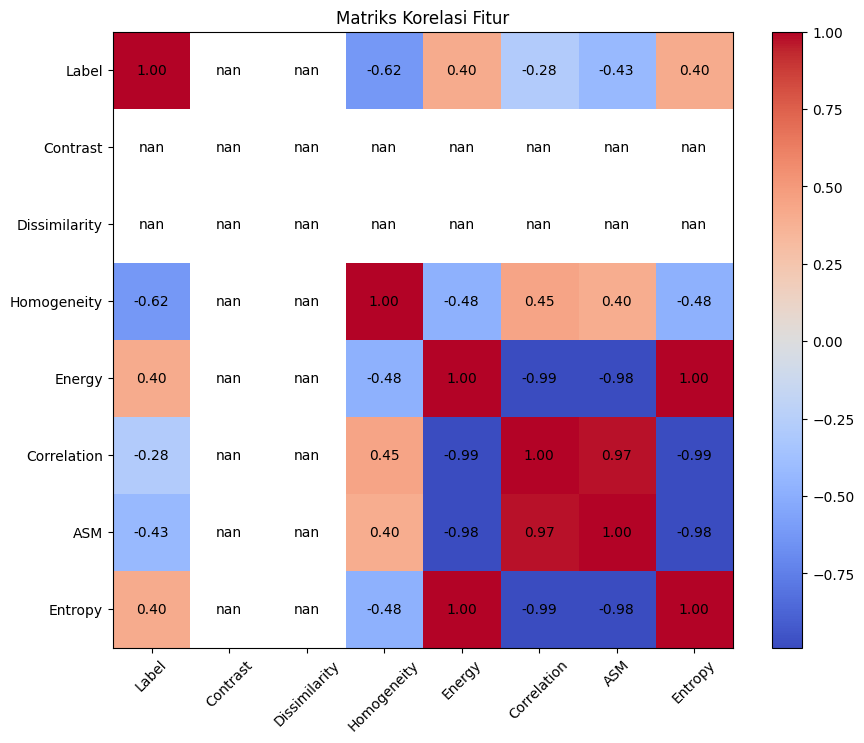

Selected Features: []
Selected Features: []
     Filename  Label  Contrast  Dissimilarity  Homogeneity    Energy  \
0  Filename_0      0       0.0            0.0          1.0  0.000116   
1  Filename_1      1       0.0            0.0          1.0  0.000117   
2  Filename_2      2       0.0            0.0          1.0  0.000115   
3  Filename_3      3       0.0            0.0          1.0  0.000119   
4  Filename_4      4       0.0            0.0          1.0  0.000116   

    Correlation       ASM   Entropy  
0  1.395165e+13  9.098968  0.000116  
1  1.387435e+13  9.091908  0.000117  
2  1.407919e+13  9.104619  0.000115  
3  1.364151e+13  9.081730  0.000119  
4  1.399589e+13  9.097776  0.000116  


In [32]:
def feature_selection_correlation(results):
    data = []
    columns = ['Filename', 'Label', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM', 'Entropy']
    for fname, label, features in results:
        row = [fname, label]
        row.extend(features.values())
        data.append(row)
    
    df = pd.DataFrame(data, columns=columns)
    
    df['Label'] = df['Label'].astype('category').cat.codes
    
    numeric_df = df.drop(columns=['Filename'])
    
    corr = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.title("Matriks Korelasi Fitur")
    plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.index)), corr.index)
    for i in range(len(corr.columns)):
        for j in range(len(corr.index)):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')
    plt.show()
    
    selected_features = corr['Label'][(corr['Label'] > 0.99) | (corr['Label'] < -0.99)].index.tolist()
    selected_features.remove('Label')
    
    print("Selected Features:", selected_features)
    
    return df, selected_features

# Example usage:
# Assume you have a list of edge images called edge_images_prewitt_rotated
edge_images_prewitt_rotated = [
    # Replace with your actual edge images
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

# Calculate GLCM matrices
glcm_matrices = []
for edge_image in edge_images_prewitt_rotated:
    glcm_matrices.extend(calculate_glcm(edge_image))

# Calculate GLCM features
glcm_features = calculate_glcm_features(glcm_matrices)

# Prepare data for DataFrame
results = []
for i, features in enumerate(glcm_features):
    results.append((f'Filename_{i}', f'Label_{i}', features))

# Perform feature selection based on correlation
df_selected, selected_features = feature_selection_correlation(results)
print("Selected Features:", selected_features)
print(df_selected.head())

### Splitting Data

In [33]:
X = df_selected.drop(columns=['Label'])
y = df_selected['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (6, 8)
Testing data shape: (2, 8)


### Normalization

In [34]:
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

X_train_normalized = X_train_numeric.apply(min_max_normalization, axis=0)

X_test_normalized = X_test_numeric.apply(min_max_normalization, axis=0)

print("Normalized Training data shape :", X_train_normalized.shape)
print("Normalized Testing data shape:", X_test_normalized.shape)


Normalized Training data shape : (6, 7)
Normalized Testing data shape: (2, 7)


## Modeling

In [35]:
X_train_numeric = X_train.drop(columns=['Filename'])
X_test_numeric = X_test.drop(columns=['Filename'])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_numeric, y_train)

y_pred_train = rf_classifier.predict(X_train_numeric)
y_pred_test = rf_classifier.predict(X_test_numeric)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 1.0
Testing Accuracy: 0.0


## Evaluation

In [36]:
X_train_numeric = X_train.drop(columns=['Filename'])
X_test_numeric = X_test.drop(columns=['Filename'])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_numeric, y_train)

y_pred_train = rf_classifier.predict(X_train_numeric)
y_pred_test = rf_classifier.predict(X_test_numeric)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train, average='macro', zero_division='warn')
precision_test = precision_score(y_test, y_pred_test, average='macro', zero_division='warn')

recall_train = recall_score(y_train, y_pred_train, average='macro', zero_division='warn')
recall_test = recall_score(y_test, y_pred_test, average='macro', zero_division='warn')

f1_train = f1_score(y_train, y_pred_train, average='macro', zero_division='warn')
f1_test = f1_score(y_test, y_pred_test, average='macro', zero_division='warn')

print("Evaluation Metrics:")
print("-----------------------------------------------------")
print("| Metric      |   Training Set   |   Testing Set    |")
print("-----------------------------------------------------")
print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
print("-----------------------------------------------------")

print("Confusion Matrix:")
print("Training Set")
print(conf_matrix_train)
print("\nTesting Set")
print(conf_matrix_test)

Evaluation Metrics:
-----------------------------------------------------
| Metric      |   Training Set   |   Testing Set    |
-----------------------------------------------------
| Accuracy    |    1.0000        |    0.0000        |
| Precision   |    1.0000        |    0.0000        |
| Recall      |    1.0000        |    0.0000        |
| F1-score    |    1.0000        |    0.0000        |
-----------------------------------------------------
Confusion Matrix:
Training Set
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]

Testing Set
[[0 0 0 1]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]]
